In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프에 한글 적용을 위한 설정
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

In [2]:
lotto = pd.read_excel("lotto_1062.xlsx")
lotto.shape

(1062, 9)

### 추첨일 데이터가 추가된 파일

In [3]:
lotto.head()

,회차,추첨일,1,2,3,4,5,6,보너스
0,1062,2023.04.08,20,31,32,40,41,45,12
1,1061,2023.04.01,4,24,27,35,37,45,15
2,1060,2023.03.25,3,10,24,33,38,45,36
3,1059,2023.03.18,7,10,22,25,34,40,27
4,1058,2023.03.11,11,23,25,30,32,40,42


In [5]:
lotto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회차      1062 non-null   int64 
 1   추첨일     1062 non-null   object
 2   1       1062 non-null   int64 
 3   2       1062 non-null   int64 
 4   3       1062 non-null   int64 
 5   4       1062 non-null   int64 
 6   5       1062 non-null   int64 
 7   6       1062 non-null   int64 
 8   보너스     1062 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 74.8+ KB


#### 파생변수 만들기

In [23]:
lotto["year"] = lotto["추첨일"].str.split(".").str.get(0).astype(int)
lotto["month"] = lotto["추첨일"].str.split(".").str.get(1).astype(int)
lotto["day"] = lotto["추첨일"].str.split(".").str.get(2).astype(int)
lotto.head()

,회차,추첨일,1,2,3,4,5,6,보너스,year,month,day
0,1062,2023.04.08,20,31,32,40,41,45,12,2023,4,8
1,1061,2023.04.01,4,24,27,35,37,45,15,2023,4,1
2,1060,2023.03.25,3,10,24,33,38,45,36,2023,3,25
3,1059,2023.03.18,7,10,22,25,34,40,27,2023,3,18
4,1058,2023.03.11,11,23,25,30,32,40,42,2023,3,11


In [24]:
lotto["추첨일"] = pd.to_datetime(lotto["추첨일"])
lotto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   회차      1062 non-null   int64         
 1   추첨일     1062 non-null   datetime64[ns]
 2   1       1062 non-null   int64         
 3   2       1062 non-null   int64         
 4   3       1062 non-null   int64         
 5   4       1062 non-null   int64         
 6   5       1062 non-null   int64         
 7   6       1062 non-null   int64         
 8   보너스     1062 non-null   int64         
 9   year    1062 non-null   int32         
 10  month   1062 non-null   int32         
 11  day     1062 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(8)
memory usage: 87.2 KB


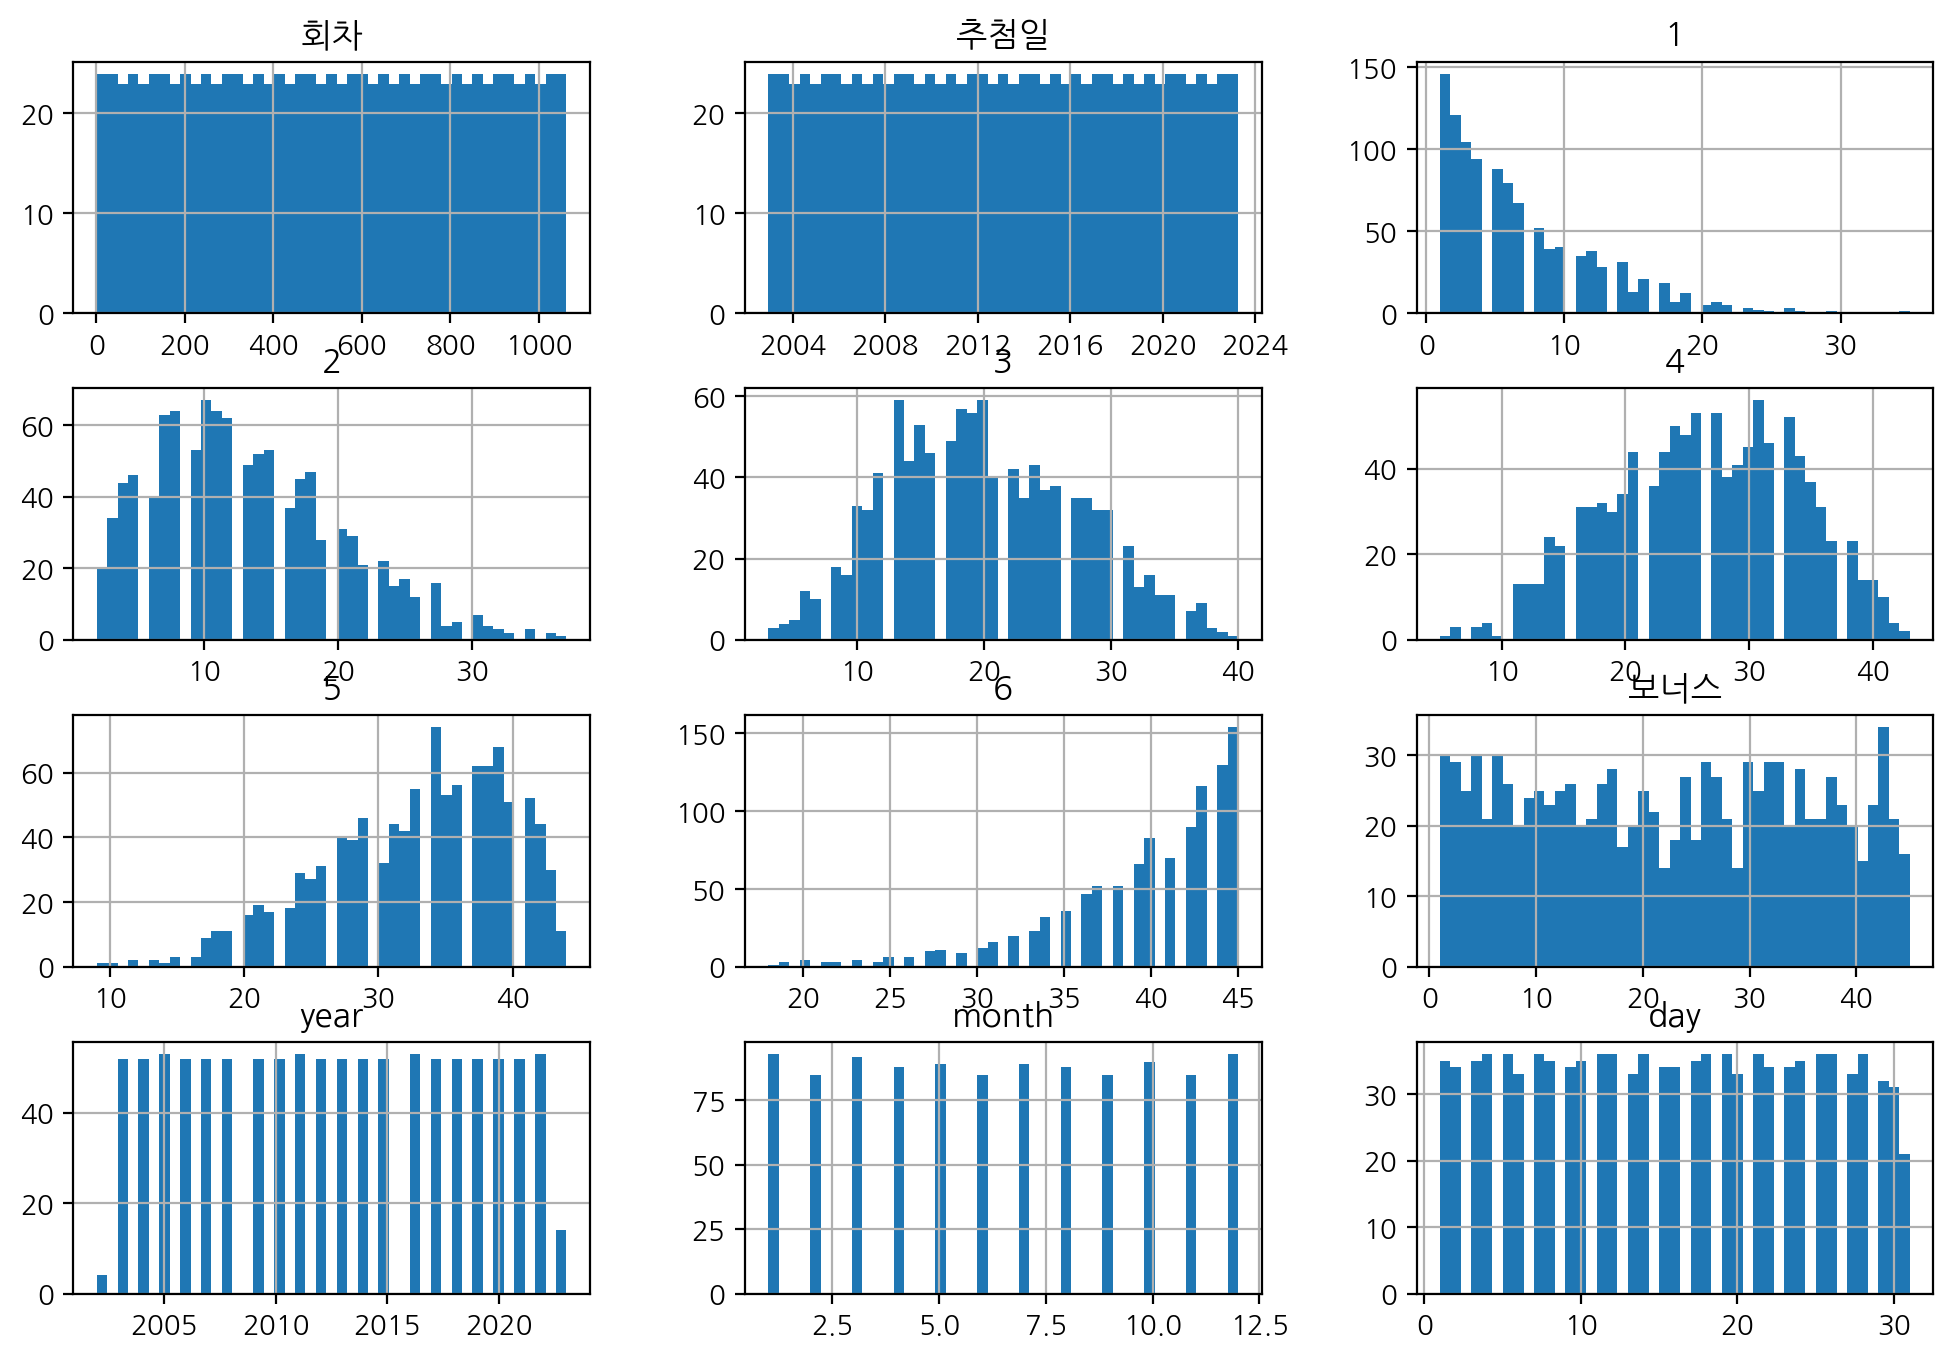

In [55]:
lotto.hist(bins=45, figsize=(12, 8));

### 년도별 EDA

In [32]:
lotto_year_mean = lotto.groupby("year").mean().sort_index(ascending=False)
lotto_year_mean

,회차,1,2,3,4,5,6,보너스,month,day
year,,,,,,,,,,
2023,1055.5,10.071429,17.357143,24.357143,29.142857,33.642857,41.500000,23.642857,2.285714,13.928571
2022,1022.0,7.471698,13.415094,19.792453,25.433962,32.528302,39.000000,22.905660,6.528302,15.641509
2021,969.5,6.000000,12.519231,19.980769,26.596154,32.769231,39.461538,23.384615,6.442308,15.769231
2020,917.5,6.519231,13.134615,19.807692,26.673077,33.153846,39.865385,23.923077,6.480769,15.750000
2019,865.5,7.807692,14.653846,22.980769,28.673077,34.038462,40.769231,21.096154,6.538462,15.846154
2018,813.5,6.788462,13.346154,19.115385,26.134615,33.173077,40.038462,21.769231,6.576923,15.673077
2017,761.5,6.903846,13.153846,19.057692,24.846154,32.538462,38.750000,20.961538,6.615385,15.500000
2016,709.0,5.377358,12.207547,19.207547,25.283019,32.849057,39.169811,25.830189,6.528302,15.811321
2015,656.5,7.346154,13.000000,18.788462,26.134615,32.884615,39.538462,21.115385,6.461538,16.173077


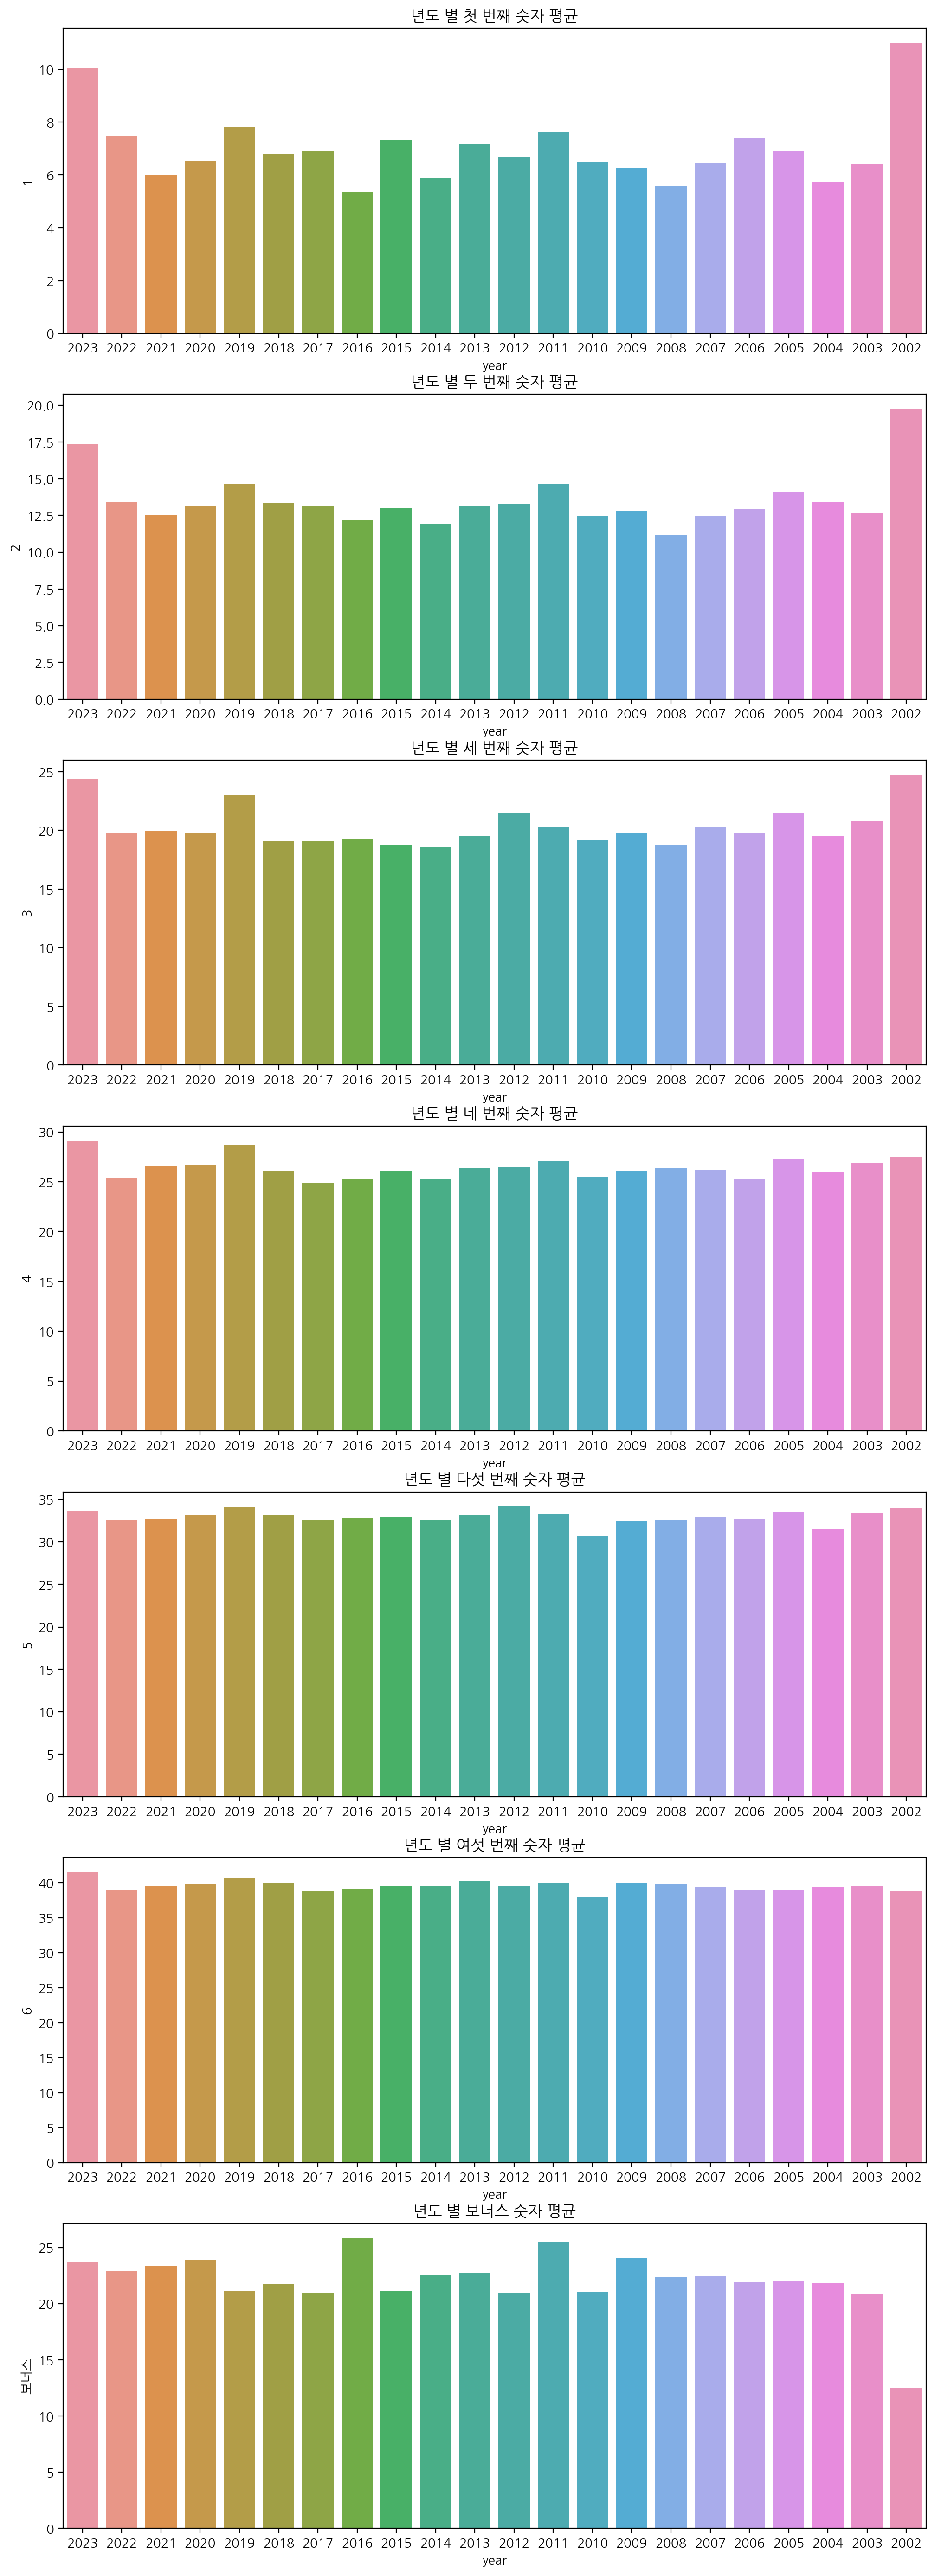

In [50]:
fig, axes = plt.subplots(7,1, figsize=(12,35))
sns.barplot(data=lotto_year_mean, x=lotto_year_mean.index, y=1, order=lotto_year_mean.index, ax=axes[0]).set_title("년도 별 첫 번째 숫자 평균");
sns.barplot(data=lotto_year_mean, x=lotto_year_mean.index, y=2, order=lotto_year_mean.index, ax=axes[1]).set_title("년도 별 두 번째 숫자 평균");
sns.barplot(data=lotto_year_mean, x=lotto_year_mean.index, y=3, order=lotto_year_mean.index, ax=axes[2]).set_title("년도 별 세 번째 숫자 평균");
sns.barplot(data=lotto_year_mean, x=lotto_year_mean.index, y=4, order=lotto_year_mean.index, ax=axes[3]).set_title("년도 별 네 번째 숫자 평균");
sns.barplot(data=lotto_year_mean, x=lotto_year_mean.index, y=5, order=lotto_year_mean.index, ax=axes[4]).set_title("년도 별 다섯 번째 숫자 평균");
sns.barplot(data=lotto_year_mean, x=lotto_year_mean.index, y=6, order=lotto_year_mean.index, ax=axes[5]).set_title("년도 별 여섯 번째 숫자 평균");
sns.barplot(data=lotto_year_mean, x=lotto_year_mean.index, y="보너스", order=lotto_year_mean.index, ax=axes[6]).set_title("년도 별 보너스 숫자 평균");

In [57]:
numbers = list(range(1,46))

Text(0.5, 1.0, '보너스 숫자 분포')

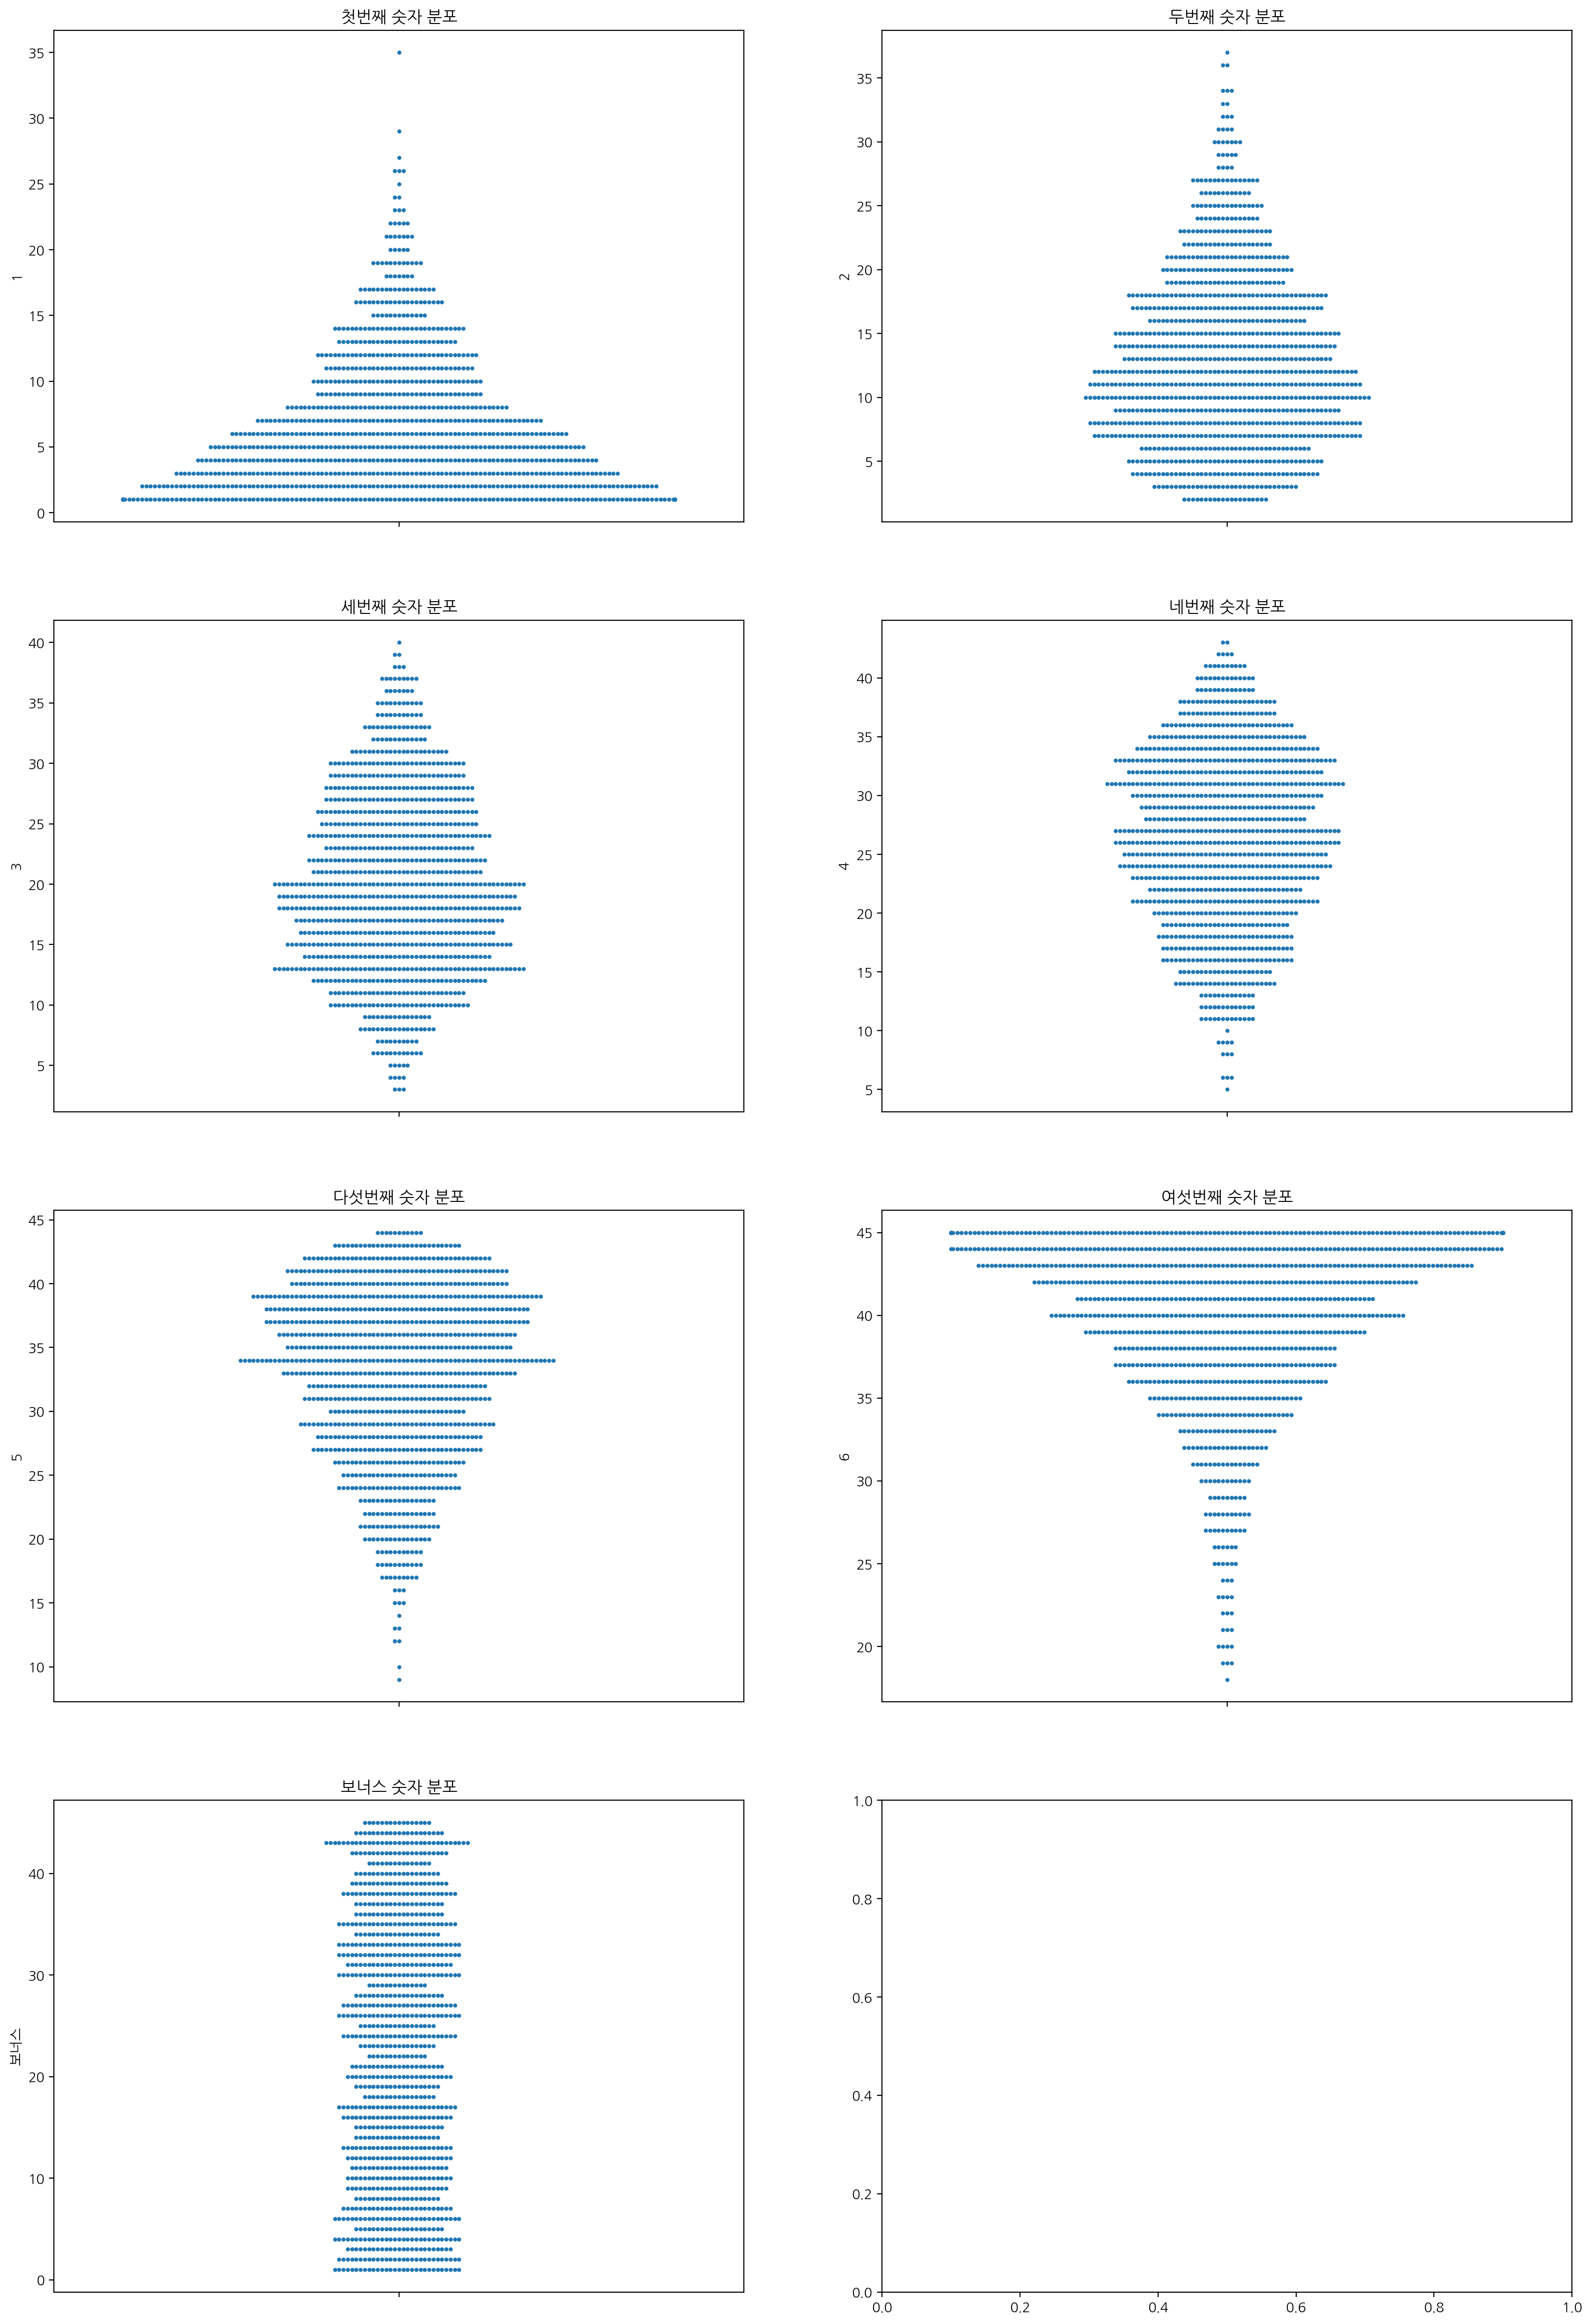

In [75]:
fig, axes = plt.subplots(4,2, figsize=(20, 30))
sns.swarmplot(data=lotto, y=1, size=3, ax=axes[0][0]).set_title("첫번째 숫자 분포")
sns.swarmplot(data=lotto, y=2, size=3, ax=axes[0][1]).set_title("두번째 숫자 분포")
sns.swarmplot(data=lotto, y=3, size=3, ax=axes[1][0]).set_title("세번째 숫자 분포")
sns.swarmplot(data=lotto, y=4, size=3, ax=axes[1][1]).set_title("네번째 숫자 분포")
sns.swarmplot(data=lotto, y=5, size=3, ax=axes[2][0]).set_title("다섯번째 숫자 분포")
sns.swarmplot(data=lotto, y=6, size=3, ax=axes[2][1]).set_title("여섯번째 숫자 분포")
sns.swarmplot(data=lotto, y="보너스", size=3, ax=axes[3][0]).set_title("보너스 숫자 분포");

### 최근 100회

In [76]:
lotto_100 = lotto.head(100)
lotto_100.head()

,회차,추첨일,1,2,3,4,5,6,보너스,year,month,day
0,1062,2023-04-08,20,31,32,40,41,45,12,2023,4,8
1,1061,2023-04-01,4,24,27,35,37,45,15,2023,4,1
2,1060,2023-03-25,3,10,24,33,38,45,36,2023,3,25
3,1059,2023-03-18,7,10,22,25,34,40,27,2023,3,18
4,1058,2023-03-11,11,23,25,30,32,40,42,2023,3,11


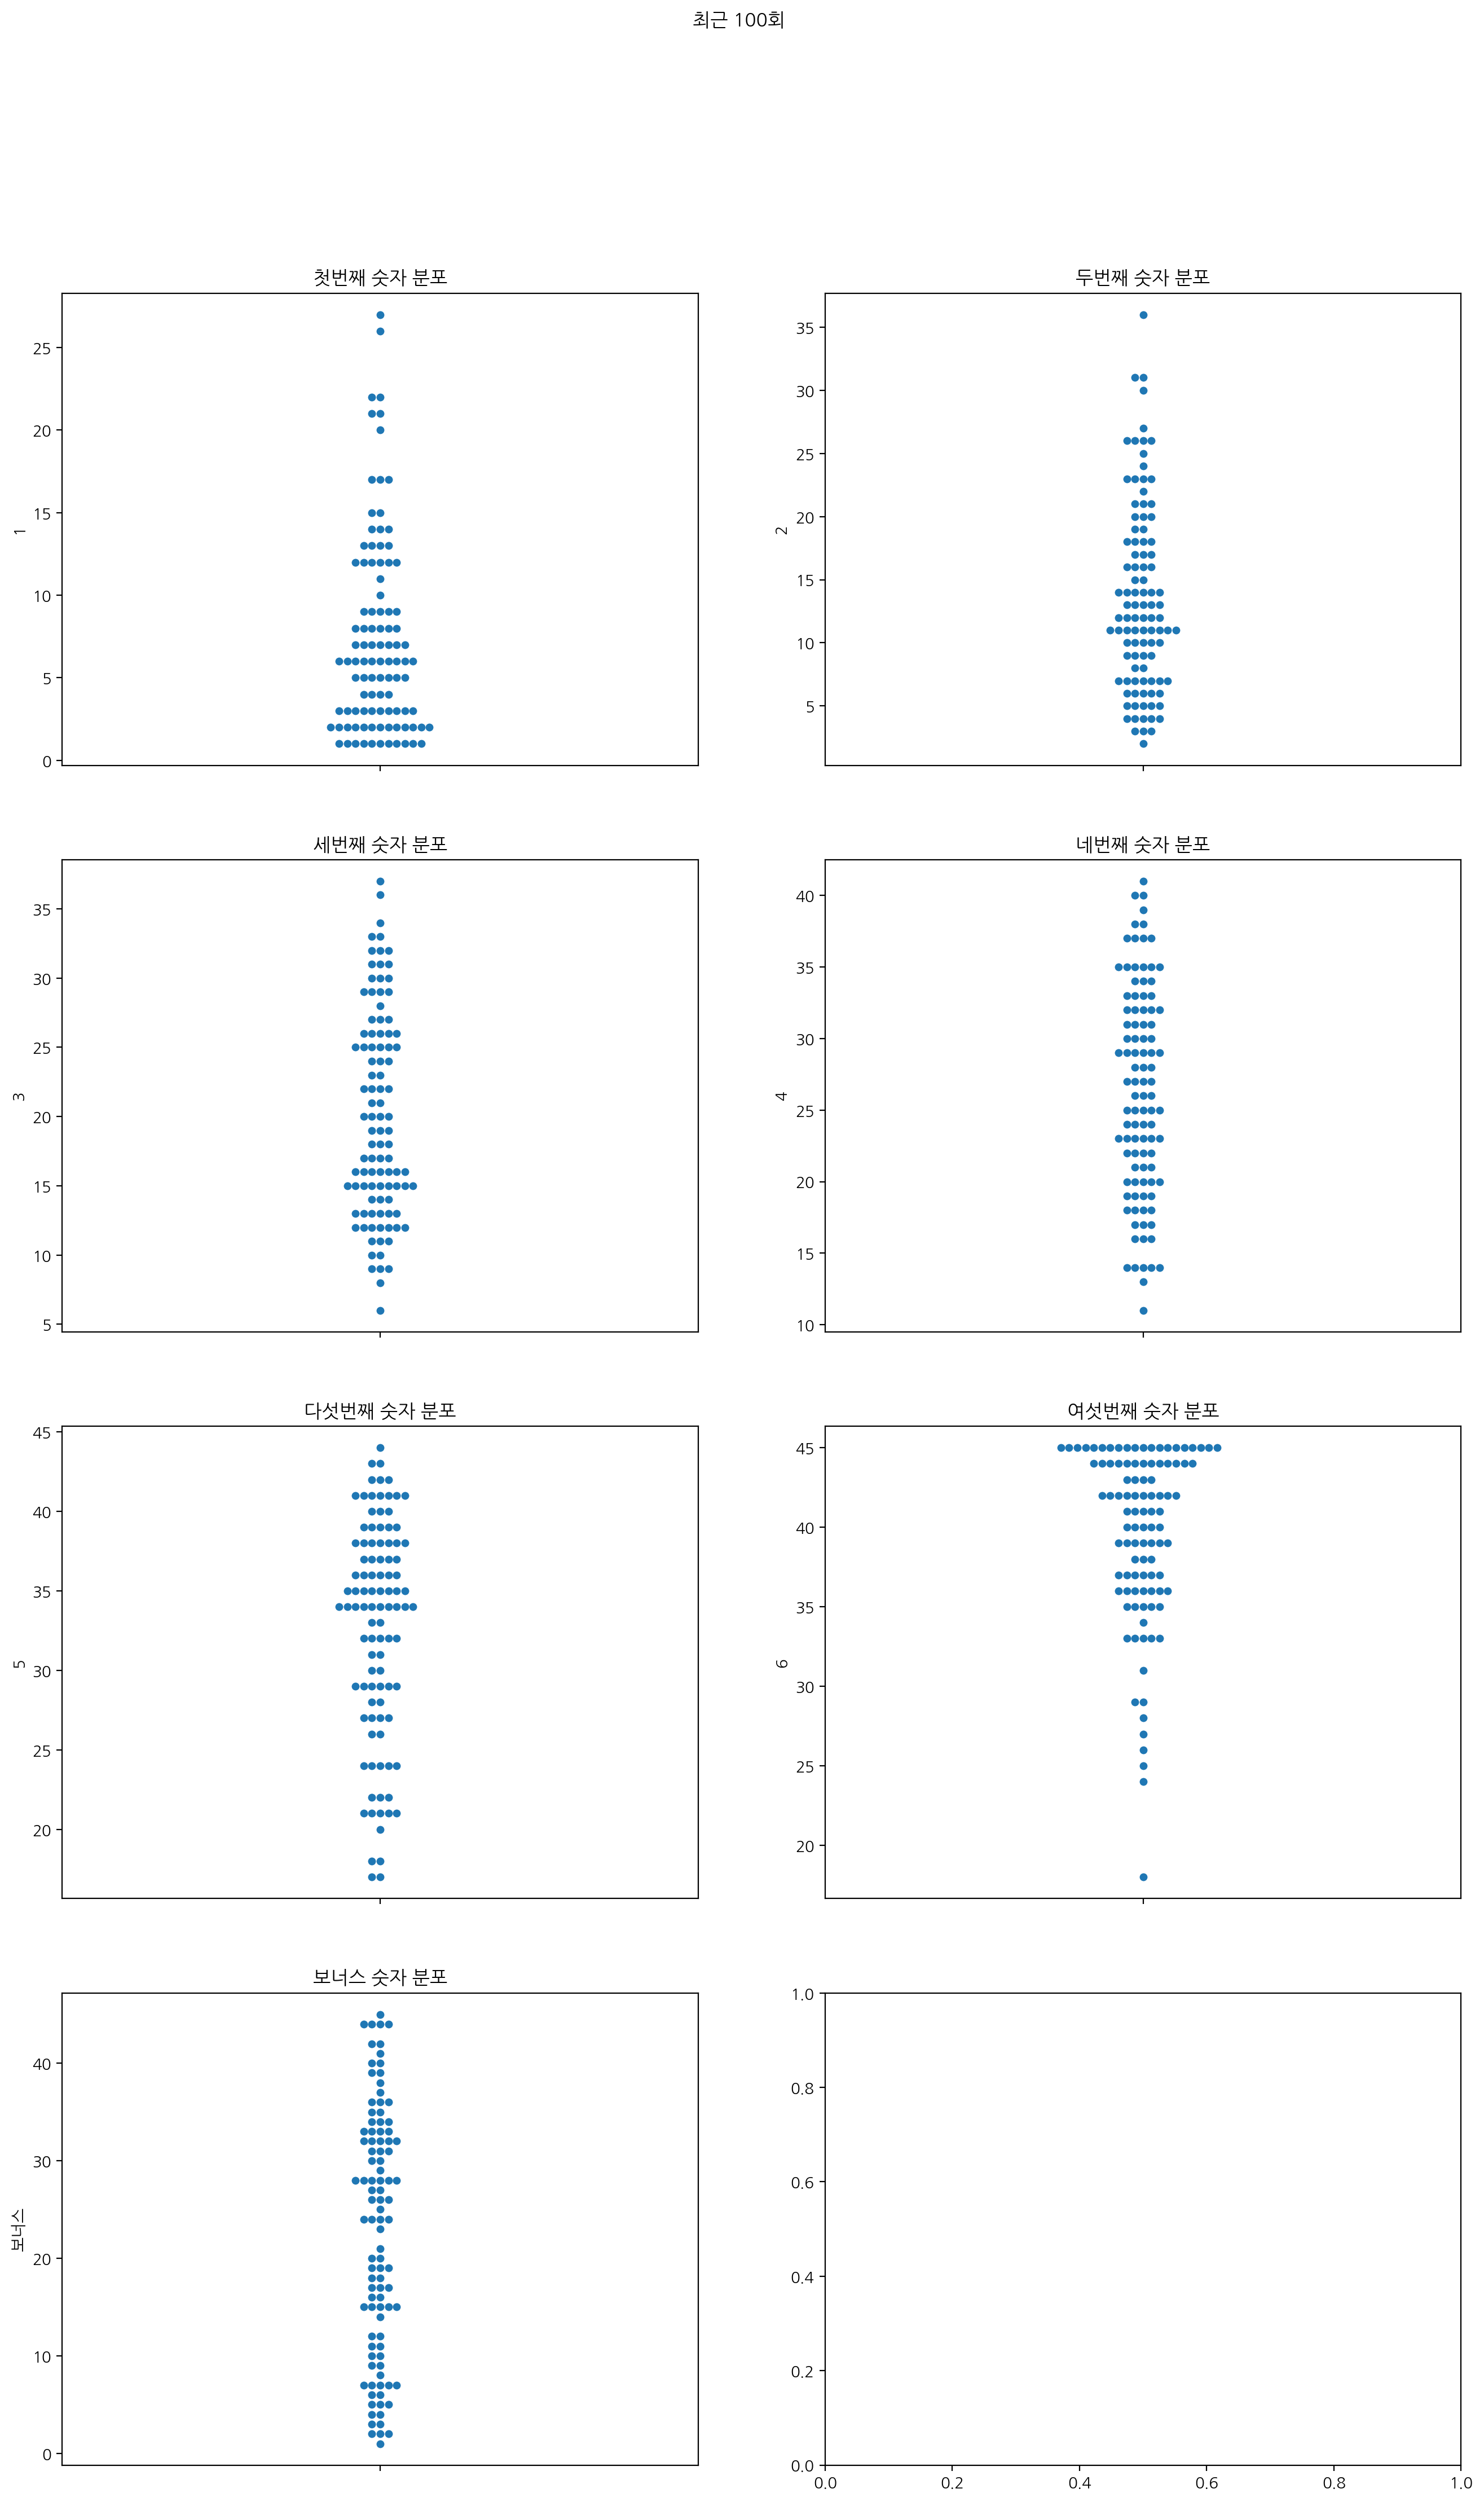

In [89]:
fig, axes = plt.subplots(4,2, figsize=(16, 25))
fig.suptitle("최근 100회")
sns.swarmplot(data=lotto_100, y=1, size=5, ax=axes[0][0]).set_title("첫번째 숫자 분포")
sns.swarmplot(data=lotto_100, y=2, size=5, ax=axes[0][1]).set_title("두번째 숫자 분포")
sns.swarmplot(data=lotto_100, y=3, size=5, ax=axes[1][0]).set_title("세번째 숫자 분포")
sns.swarmplot(data=lotto_100, y=4, size=5, ax=axes[1][1]).set_title("네번째 숫자 분포")
sns.swarmplot(data=lotto_100, y=5, size=5, ax=axes[2][0]).set_title("다섯번째 숫자 분포")
sns.swarmplot(data=lotto_100, y=6, size=5, ax=axes[2][1]).set_title("여섯번째 숫자 분포")
sns.swarmplot(data=lotto_100, y="보너스", size=5, ax=axes[3][0]).set_title("보너스 숫자 분포");

### 회차별 숫자 변화
- 최근 300회 정도만 보자

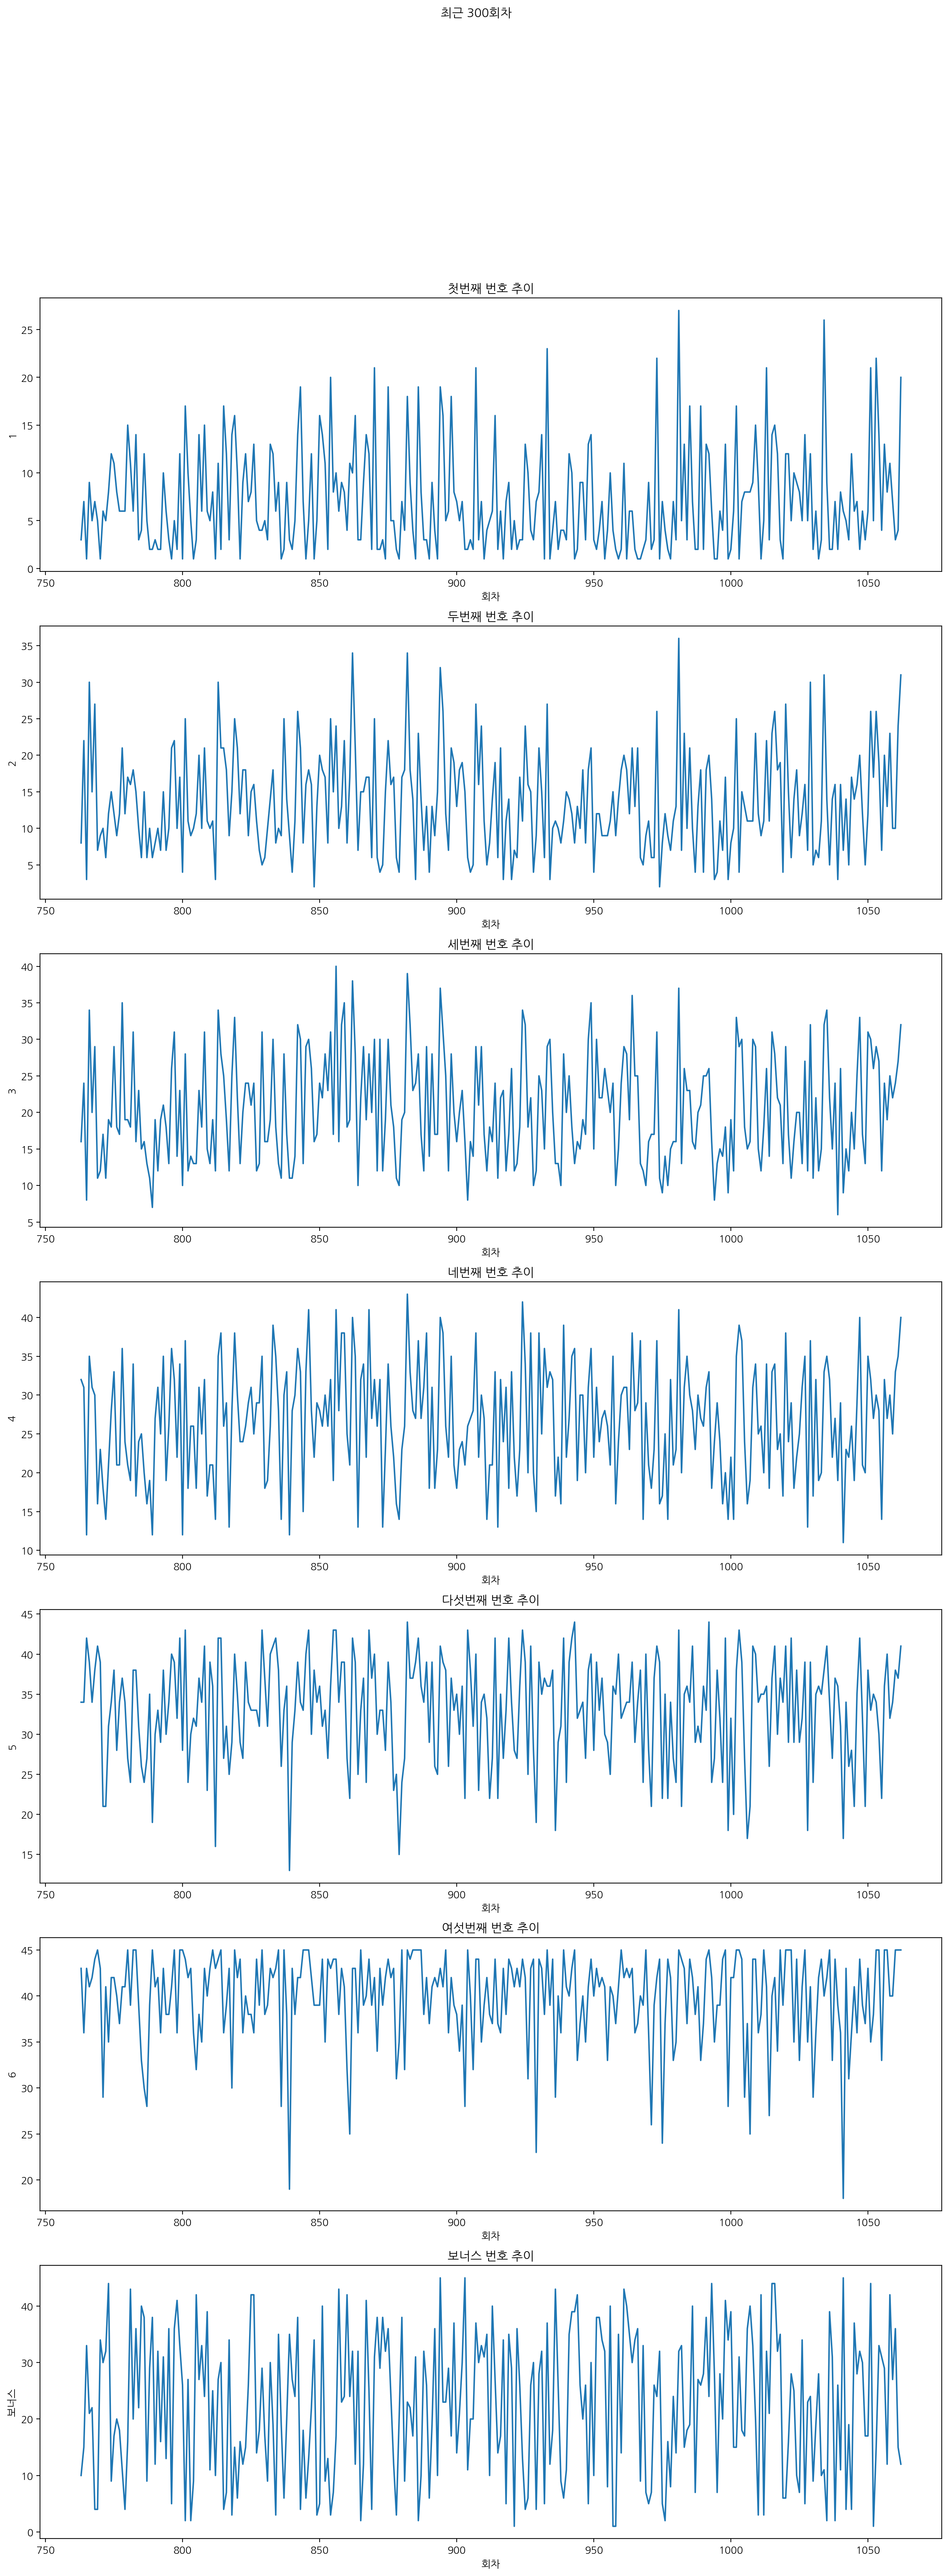

In [91]:
fig, axes = plt.subplots(7, 1, figsize=(16, 40))
fig.suptitle("최근 300회차")
sns.lineplot(data=lotto.head(300), x="회차", y=1, ax=axes[0]).set_title("첫번째 번호 추이")
sns.lineplot(data=lotto.head(300), x="회차", y=2, ax=axes[1]).set_title("두번째 번호 추이")
sns.lineplot(data=lotto.head(300), x="회차", y=3, ax=axes[2]).set_title("세번째 번호 추이")
sns.lineplot(data=lotto.head(300), x="회차", y=4, ax=axes[3]).set_title("네번째 번호 추이")
sns.lineplot(data=lotto.head(300), x="회차", y=5, ax=axes[4]).set_title("다섯번째 번호 추이")
sns.lineplot(data=lotto.head(300), x="회차", y=6, ax=axes[5]).set_title("여섯번째 번호 추이")
sns.lineplot(data=lotto.head(300), x="회차", y="보너스", ax=axes[6]).set_title("보너스 번호 추이");

- LSTM, RNN이나 시예열로 다음에 나올 수를 예측해보고싶게 생겼다!!